In [1]:
%pylab inline

/home/gjones/miniconda2/envs/readout/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Populating the interactive namespace from numpy and matplotlib


In [2]:
from kid_readout.analysis.timeseries import fftfilt, decimating_fir

In [19]:
np.random.seed(123)
x = (np.random.randn(2**24) + 1j*np.random.randn(2**24)).astype('complex64')
dfir = decimating_fir.DecimatingFIR(downsample_factor=256,num_taps=1024)


In [10]:
x.shape

(16777216,)

In [20]:
%timeit gold = fftfilt.fftfilt(dfir.coefficients[:,::-1].ravel(),x)[15::16]


1 loop, best of 3: 1.11 s per loop


In [21]:
x.shape

(16777216,)

In [22]:
%timeit result = dfir.process(x)

1 loop, best of 3: 565 ms per loop


In [23]:
%timeit result = dfir.process(x,use_fft=False)

1 loop, best of 3: 565 ms per loop


In [24]:
%timeit x.reshape((-1,256)).sum(1)

100 loops, best of 3: 14.4 ms per loop


In [18]:
result.dtype

dtype('complex64')

In [28]:
%timeit np.empty_like(x)

The slowest run took 15.72 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 4.72 µs per loop


In [8]:
np.allclose(gold,result)

NameError: name 'gold' is not defined

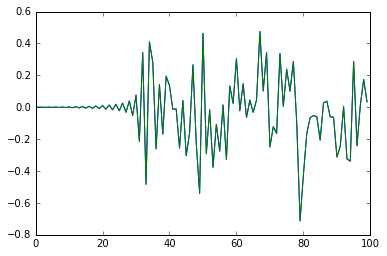

In [11]:
plot(gold[:100])
plot(result[:100])

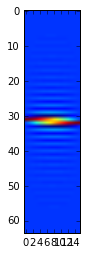

In [25]:
imshow(dfir.coefficients[:,::-1])

In [27]:
np.arange(20).reshape((4,5))[:,::-1]

array([[ 4,  3,  2,  1,  0],
       [ 9,  8,  7,  6,  5],
       [14, 13, 12, 11, 10],
       [19, 18, 17, 16, 15]])